# Previsão do Preço de Aluguéis com Machine Learning 

O dataset utilizado contém os preços de aluguéis e características de alguns imóveis da India. 

Inicialmente foi feita uma Análise Exploratória para entender o comportamento e relacionamento entre as variáveis. Após isso, foi feita a criação e implementação do modelo de Regressão Linear.

In [1]:
#importação das bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

**Análise das variáveis numéricas**

In [ ]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [ ]:
fig1= px.bar(df, x=df['BHK'].value_counts().index, y=df['BHK'].value_counts().values,
             title='Número de imóveis por quantidade de comodos',
             color=df['BHK'].value_counts().values)
fig1.update_layout(xaxis_title="Quantidade de comodos", yaxis_title="Numero de imoveis")
fig1.show()

Vimos que a maior parte dos imóveis disponíveis para locação tem entre 1 e 3 cômodos. Neste caso não incluem os banheiros.

In [ ]:
fig2= px.box(x=df['Rent'],title='Distribuição dos valores dos alugueis')
fig2.show()

In [ ]:
fig3= px.histogram(df['Rent'],title='Distribuição dos valores dos alugueis')
fig3.update_layout(xaxis_title='Preço',yaxis_title='Quantidade de Imoveis')
fig3.show()

Temos a média dos aluguéis igual a 78k e a mediana igual a $. Através dos gráficos vemos que existem alguns valores de aluguéis que são bastante altos e que influenciam diretamente na média. Vemos que a maioria dos preços está compreendida entre 10k e 70k.

In [ ]:
fig4= px.box(x=df['Size'],title='Distribuição dos tamanhos dos imóveis')
fig4.update_layout(xaxis_title='Tamanho do Imovel em pes quadrados')
fig4.show()

In [ ]:
fig5= px.histogram(df['Size'],title='Distribuição dos tamanhos dos imóveis')
fig5.update_layout(xaxis_title='Tamanho do Imovel em pes quadrados',yaxis_title='Quantidade de Imoveis')
fig5.show()

A média e mediana do tamanho dos imóveis não apresentam uma diferença muito alta, cerca de 10 metros quadrados. Vemos através do histograma e boxplot que a maior parte dos imóveis tem tamanho entre 500 e 1200 pés quadrados. São imóveis que possuem um tamanho legal para famílias pequenas.

In [ ]:
fig6= px.bar(df, x=df['Bathroom'].value_counts().index, y=df['Bathroom'].value_counts().values,
             title='Número de imóveis por quantidade de banheiros', color=df['Bathroom'].value_counts().values)
fig6.update_layout(xaxis_title="Quantidade de banheiros", yaxis_title="Numero de imoveis")
fig6.show()

A maioria dos imóveis possuem 1 ou 2 banheiros. Existem pouqíssimos imóveis com 6 ou mais banheiros.

**Análise de variáveis categóricas**

In [ ]:
fig7= px.bar(x=df['Area Type'].value_counts().index,
            y=df['Area Type'].value_counts().values,
             title='Imóveis com relação ao tipo de area',
             color=df['Area Type'].value_counts().values,
             text_auto=True)
fig7.update_layout(xaxis_title="Tipo de area", yaxis_title="Numero de imoveis")
fig7.show()

In [ ]:
fig8= px.bar(x=df['Furnishing Status'].value_counts().index,
            y=df['Furnishing Status'].value_counts().values,
             title='Imóveis com relação a mobilia',
             color=df['Furnishing Status'].value_counts().values,
             text_auto=True)
fig8.update_layout(xaxis_title="Tipo de mobilia", yaxis_title="Numero de imoveis")
fig8.show()

In [ ]:
fig9= px.bar(x=df['Tenant Preferred'].value_counts().index,
            y=df['Tenant Preferred'].value_counts().values,
             color=df['Tenant Preferred'].value_counts().values,
             title='Imóveis com relação ao tipo de inqulino desejado pelo proprietario',
             text_auto=True)
fig9.update_layout(xaxis_title="Quantidade de banheiros", yaxis_title="Numero de imoveis")
fig9.show()

Temos que 47% dos imóveis são semi mobiliados, 38% não tem mobilia alguma e apenas 15% são totalmente mobiliados.
Para a grande maioria dos proprietários (72,5%) dos imóveis tanto faz se o inquilo é solteiro (a) ou casado (a).

**Análise Multivariada**

In [ ]:
bhk= df.groupby('BHK').Rent.mean()
bhk= pd.DataFrame(bhk)
bhk['BHK']=bhk.index
fig10= px.treemap(bhk,path=['BHK'],values='Rent',
                  title='Treemap da media de valor dos alugueis por quantidade de comodos',
                  color='Rent')
fig10.show()

In [ ]:
df.loc[df.BHK==6]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
83,2022-06-21,6,20000,1000,1 out of 1,Super Area,Sonarpur,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner
3320,2022-06-28,6,280000,4500,Ground out of 1,Carpet Area,Raja Annamalai Puram,Chennai,Semi-Furnished,Bachelors,5,Contact Agent
3584,2022-06-02,6,60000,1800,1 out of 3,Super Area,Besant Nagar,Chennai,Furnished,Bachelors/Family,6,Contact Owner
4350,2022-06-18,6,60000,2800,Ground out of 3,Super Area,"Boduppal, NH 2 2",Hyderabad,Furnished,Bachelors/Family,7,Contact Owner
4479,2022-07-07,6,20000,2400,Ground out of 1,Super Area,"Mallikarjuna Nagar, Secunderabad",Hyderabad,Unfurnished,Family,4,Contact Owner
4518,2022-05-12,6,35000,3400,Ground out of 2,Super Area,Rampally,Hyderabad,Unfurnished,Bachelors/Family,7,Contact Owner
4648,2022-07-06,6,80000,4500,1 out of 2,Super Area,"Kakateeya Nagar, Secunderabad",Hyderabad,Semi-Furnished,Bachelors/Family,6,Contact Owner
4696,2022-07-06,6,30000,4200,Ground out of 2,Super Area,Kuntloor,Hyderabad,Semi-Furnished,Bachelors/Family,5,Contact Owner


Analisando o gráfico acima, constatamos que quanto mais comodos na casa, maior é a média do valor do aluguel. 

In [ ]:
fig11= px.box(x=df['City'],y=df['Rent'],title='Valor dos alugueis por cidade')
fig11.update_layout(xaxis_title="Cidade", yaxis_title='Valor do aluguel')

Mumbai é a cidade que apresenta os maiores valores de alugueis, seguida de Delhi, Chennai, Bangalore, Hyderabad e por ultimo Kolkata.
Analisando este gráfico junto com o Treemap da media de valor dos alugueis por quantidade de comodos, podemos entender porque os imóveis de 6 comodos não seguiram a tendencia do gráfico. A maior parte desses imóveis estão situados em Hyderabad, que apresenta a segunda menor média de valor dos alugueis.

In [ ]:
fig12= px.scatter(x=df['Size'],y=df['Rent'],
                  title='Relação entre tamanho do imovel e valor do aluguel',
                  trendline='ols')
fig12.update_layout(xaxis_title="Tamanho do imovel", yaxis_title='Valor do aluguel')
fig12.show()

Através do gráfico podemos ver que há uma relação linear positiva entre as variáveis, ou seja, o valor do aluguel tende a aumentar com o tamanho do imovel.

In [ ]:
bath= df.groupby('Bathroom').Rent.mean()
bath= pd.DataFrame(bath)
bath['Bathroom']=bath.index
fig13= px.treemap(bath,path=['Bathroom'],values='Rent',
                  title='Treemap da media de valor dos alugueis por quantidade de banheiros',
                  color='Rent')
fig13.show()

In [ ]:
df.loc[df.Bathroom==5]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
531,2022-07-07,4,300000,1600,43 out of 78,Carpet Area,"Trump Tower, Worli",Mumbai,Semi-Furnished,Bachelors/Family,5,Contact Agent
543,2022-07-04,5,400000,2308,17 out of 31,Carpet Area,"Runwal Elegante, Andheri West",Mumbai,Furnished,Family,5,Contact Agent
556,2022-07-09,4,190000,2079,4 out of 58,Carpet Area,"Bombay Dyeing Two ICC, Dadar East",Mumbai,Semi-Furnished,Bachelors/Family,5,Contact Agent
589,2022-05-14,4,350000,3000,39 out of 60,Carpet Area,"Lodha World Crest, Lower Parel",Mumbai,Semi-Furnished,Bachelors/Family,5,Contact Agent
627,2022-06-25,4,180000,2000,4 out of 14,Carpet Area,"Vertical Bliss, Bandra West",Mumbai,Furnished,Bachelors/Family,5,Contact Agent
651,2022-06-23,4,250000,1545,65 out of 78,Carpet Area,"Trump Tower, Worli",Mumbai,Semi-Furnished,Family,5,Contact Agent
666,2022-07-04,5,350000,1880,15 out of 31,Carpet Area,"Runwal Elegante, Andheri West",Mumbai,Furnished,Family,5,Contact Agent
710,2022-06-08,3,300000,1600,18 out of 23,Super Area,"Chaitanya Towers, Prabhadevi",Mumbai,Semi-Furnished,Bachelors/Family,5,Contact Owner
742,2022-06-25,4,320000,2700,10 out of 12,Carpet Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,5,Contact Agent
746,2022-06-28,3,100000,1286,7 out of 21,Carpet Area,"Lodha Bel Air, Jogeshwari West",Mumbai,Unfurnished,Bachelors/Family,5,Contact Agent


Temos que a maior media de valor dos alugueis são de imoveis que possuem 5 banheiros. Existem apenas 60 imoveis com 5 banheiros, cerca de 1% dos imóveis, e a maioria deles estão localizados em Mumbai, a cidade que apresenta os maiores valores de alugueis. Essa pode ser uma causa para que os imoveis com 5 banheiros tenham a maior media de preço.

In [ ]:

fig14= px.bar(x=df.groupby('Furnishing Status').Rent.mean().index,
              y=df.groupby('Furnishing Status').Rent.mean().values,
              title='Media do valor dos alugueis por tipo de mobilia',
              color=df.groupby('Furnishing Status').Rent.mean().values)
fig14.update_layout(xaxis_title='Tipo de mobilia',yaxis_title='Media de valor do aluguel')
fig14.show()

Podemos ver que a média de preço mais que dobra de um imóvel sem mobilia para um totalmente mobiliado.

In [ ]:
fig15= px.treemap(df,path=['City','Area Locality'],values='Rent',
                  title='Distribuiçao dos preços dos alugueis por cidade e bairro')
fig15.show()

O bairro que apresenta os maiores valores de alugueis é Bandra West em Mumbai. Mumbai é a cidade que apresenta os bairros com alugueis mais caros.

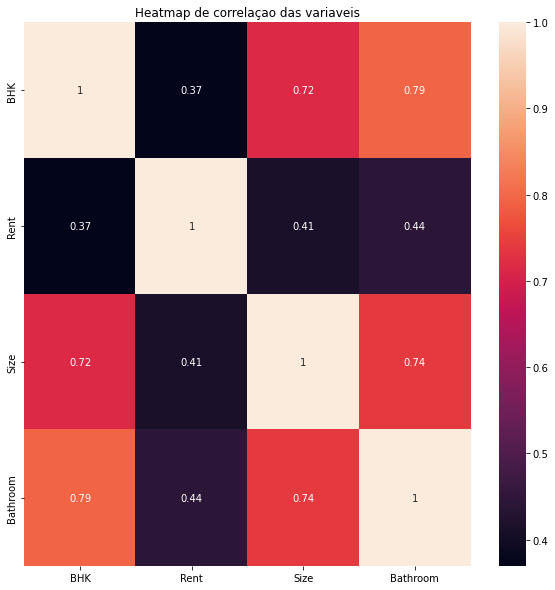

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Heatmap de correlaçao das variaveis")
sns.heatmap(data=df.corr(),annot=True)
plt.show()

Temos uma correlação moderada entre as variáveis.

**Manipulação dos dados**

In [ ]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Algumas variaveis não são relevantes para a predição do valor do aluguel, logo abaixo faremos o drop delas.

In [3]:
new_df= df.drop(['Posted On','Floor','Area Locality','Tenant Preferred','Point of Contact'],axis=1)
new_df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom
0,2,10000,1100,Super Area,Kolkata,Unfurnished,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,1
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,1
3,2,10000,800,Super Area,Kolkata,Unfurnished,1
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,1


In [4]:
#vamos renomear as colunas
new_df.rename(columns={'BHK':'qnt_comodos','Rent':'price','Area Type':'area_type',
                      'Furnishing Status':'furn_status','Bathroom':'bath',
                       'Size':'size','City':'city'},inplace=True)
new_df.head()

,qnt_comodos,price,size,area_type,city,furn_status,bath
0,2,10000,1100,Super Area,Kolkata,Unfurnished,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,1
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,1
3,2,10000,800,Super Area,Kolkata,Unfurnished,1
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,1


In [5]:
new_df=pd.get_dummies(new_df,columns=['area_type','city','furn_status'])
new_df.head()

,qnt_comodos,price,size,bath,area_type_Built Area,area_type_Carpet Area,area_type_Super Area,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,furn_status_Furnished,furn_status_Semi-Furnished,furn_status_Unfurnished
0,2,10000,1100,2,0,0,1,0,0,0,0,1,0,0,0,1
1,2,20000,800,1,0,0,1,0,0,0,0,1,0,0,1,0
2,2,17000,1000,1,0,0,1,0,0,0,0,1,0,0,1,0
3,2,10000,800,1,0,0,1,0,0,0,0,1,0,0,0,1
4,2,7500,850,1,0,1,0,0,0,0,0,1,0,0,0,1


**Modelagem**

In [6]:
#criação da variavel alvo, seleção e normalização das variaveis preditoras
y=new_df.price 
X=new_df.drop(['price'],axis=1)
sc_X= StandardScaler().fit_transform(X)

In [7]:
#criação e implementação do modelo de Regressão Linear
train_X,val_X,train_y,val_y= train_test_split(sc_X,y,random_state=7)
model= LinearRegression()
model.fit(train_X,train_y)
rent_prediction= model.predict(val_X)

In [ ]:
fig= px.scatter(x=rent_prediction,y=val_y,title='Relação entre valor predito e real',trendline='ols')
fig.update_layout(xaxis_title='Valor predito',yaxis_title='Valor real')
fig.show()

Através do gráfico plotado acima, podemos notar que não há indícios de Overfitting no modelo.

In [ ]:
from sklearn.metrics import mean_absolute_error
print('Erro absoluto medio: ',mean_absolute_error(val_y,rent_prediction))

Erro absoluto medio:  24586.154269359475


In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(val_y, rent_prediction))
print(rmse)

106006.16346936749


# **Verificando as Premissas da Regressão**

In [9]:
import statsmodels.api as sm

modelo=sm.OLS(train_y,train_X)
result= modelo.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.373
Model:                            OLS   Adj. R-squared (uncentered):              0.371
Method:                 Least Squares   F-statistic:                              175.6
Date:                Fri, 02 Sep 2022   Prob (F-statistic):                        0.00
Time:                        09:47:25   Log-Likelihood:                         -43882.
No. Observations:                3559   AIC:                                  8.779e+04
Df Residuals:                    3547   BIC:                                  8.786e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Temos um valor de R quadrado baixo, o que nos indica que as variáveis preditoras não explicam tão bem a variável alvo. O modelo consegue explicar 37,3% de variância, quanto mais ele consegue explicar, mais ajustados estão os dados reais a nossa curva de regressão.

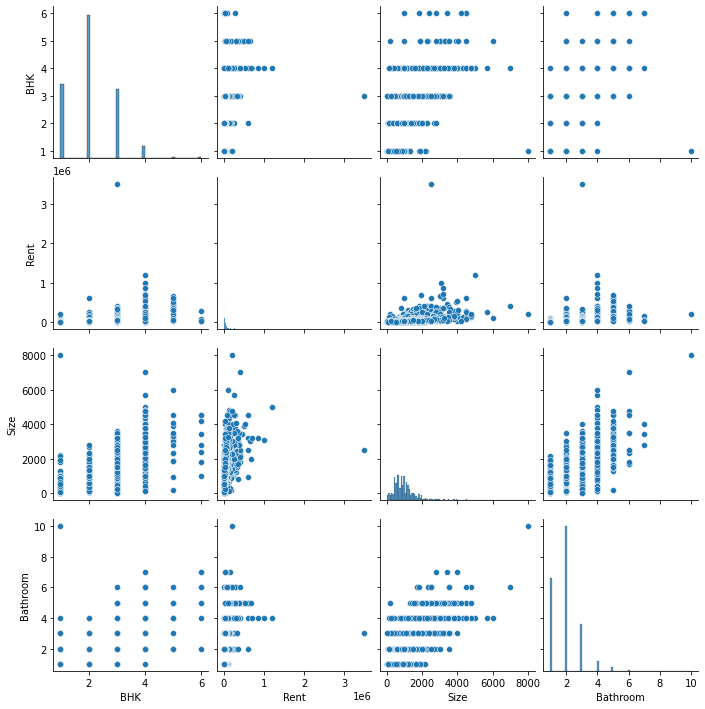

In [11]:
sns.pairplot(df)

Uma das premissas da regressão é que as variáveis preditoras tenham uma relação linear com a variável alvo. Observamos através do gráfico que apenas a variável Size apresenta uma relação linear com a variável Rent.

In [14]:
#Verificando a multicolinearidade
from statsmodels.stats.outliers_influence import variance_inflation_factor
features=['BHK','Size','Bathroom']
x= df[features]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [
	variance_inflation_factor(x.values, i)
	for i in range(len(x.columns))
]
print(vif_data.sort_values(by="VIF", ascending=False))

    feature        VIF
2  Bathroom  18.438549
0       BHK  16.836658
1      Size   7.805458


A multicolinearidade nos mostra que uma variável preditora pode ser explicada por outras variaveis preditoras, ou seja, há uma dependência entre as variáveis e impacta diretamente no modelo, já que se uma variável for remoriva impactará drasticamente no modelo.

Para analisar a multicolinearidade olhamos para o VIF (Variance Inflation Factor) cuja fórmula é dada por 1/(1-R^2). Se uma variável independente possui VIF > 10, isso significa que essa variável possui alta colinearidade com outras variáveis independentes. Alguns pesquisadores mais conservadores usam 5 como threshold para o VIF. 

Observando o resultado acima, temos que as nossas variáveis possuem uma alta colinearidade.

In [15]:
import numpy as np
res= val_y - rent_prediction
print(np.mean(res))

4325.630763921127


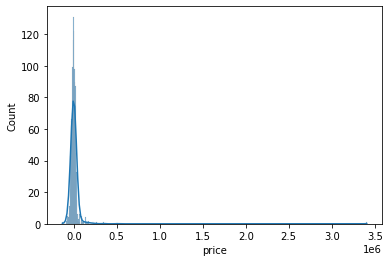

In [16]:
sns.histplot(res,kde=True)

Outra premissa da regressão linear é que os resíduos devem ter uma distribuição normal com a média próximo de zero. Através do histograma vemos que há uma distribuição normal dos resíduos, porém a média não está tão próxima de zero.

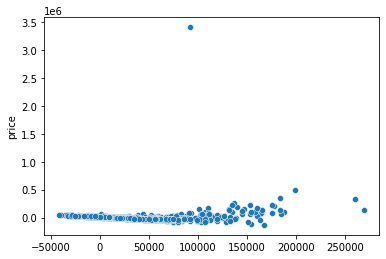

In [17]:
#Verificando a Homocedasticidade
sns.scatterplot(x=rent_prediction,y=res);

A Homocedasticidade é o termo usado para designar variância constante dos erros, ou seja, os erros não devem variar para cada valor de y. No gráfico acima vemos que, aparentemente, não há uma variância significativa dos erros com relação a y.

## **Conclusão**

Vimos que o modelo apresentou um erro absoluto médio alto e que algumas premissas da regressão não foram satisfeitas. 

Para melhorar a precisão do modelo, poderíamos adicionar e/ou melhorar a qualidade das variáveis preditoras, visto que elas apresentam uma alta multicoliearidade e não explicam tão bem a variável alvo.